<a href="https://colab.research.google.com/github/Javiour2003/ML-workshop/blob/master/Experiment_No_8_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/DataSet/Reservations.xlsx")#created the data set
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Handling Null Values

In [ ]:
df_null=pd.DataFrame(df.isnull().sum(),columns=["null values"])
df_null

,null values
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#finding ration of null val;ues to the total values using df_null data frame 
lst=[]
for i in df_null["null values"]:
  lst.append(i/len(df))
df_null["Ratio of null values to total values"]=lst
df_null

,null values,Ratio of null values to total values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [ ]:
df=df.drop(columns=['company'])#Since the ratio > 0.5

In [ ]:
df.rename(columns={"hotel":"Hotel_type"},inplace=True)

In [ ]:
df.children.describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [ ]:
df.children.fillna(0.0,inplace=True)#median value is 0 Fill NA/NaN values using the specified method.

In [ ]:
df=df.dropna()
df.isnull().sum()

Hotel_type                        0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df.reset_index(inplace = True )
'''to make indexes continuos and it will create an column index
if we dont want index column to be created you can add drop=True in the parenthesis'''

# Crude Analysis

In [ ]:
df[df.duplicated()]#to check the duplicate rows

,index,Hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
c=0
for i in df.children:
  if(i==0.0):
    c=c+1
c
#Most of the people who are booking hotels are not bringing/not having children 

95003

In [ ]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000
mean,61096.622658,0.390326,111.738007,2016.156955,27.339255,15.786639,0.978182,2.589673,1.899928,0.111229,0.007697,0.014034,0.077214,0.024364,0.201777,86.544074,2.619528,104.678736,0.053034,0.605466
std,34232.370667,0.487826,107.681005,0.706128,13.279881,8.794025,1.003991,1.905939,0.490886,0.411979,0.097088,0.117630,0.758178,0.435755,0.624948,110.713678,18.797261,50.022122,0.225357,0.799336
min,3.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,32837.250000,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000
50%,61075.500000,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,90898.250000,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,119389.000000,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [ ]:
c=0
for i in df.adults:
  if(i==0):
    c=c+1
c #no of bookings done by people with age<18(0 adults) that is no adult is with them in the hotel bookings

326

In [ ]:
c=0
l1=list(df.assigned_room_type)   
for i in range(len(df.reserved_room_type)):
    if df.reserved_room_type[i] not in l1:
        c=c+1
print(c)
#Since there is no change in assigned room type and reserved room type we can delete one of the columns

0


In [ ]:
df.drop(columns=['reserved_room_type'],axis=1,inplace=True)

# Date time Transformation

In [ ]:
df1=df.iloc[:10000,:]
'''taking first 10000 rows because the dataset is too big and 
it takes a lot of time to run the following cells'''
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           10000 non-null  int64  
 1   Hotel_type                      10000 non-null  object 
 2   is_canceled                     10000 non-null  int64  
 3   lead_time                       10000 non-null  int64  
 4   arrival_date_year               10000 non-null  int64  
 5   arrival_date_month              10000 non-null  object 
 6   arrival_date_week_number        10000 non-null  int64  
 7   arrival_date_day_of_month       10000 non-null  int64  
 8   stays_in_weekend_nights         10000 non-null  int64  
 9   stays_in_week_nights            10000 non-null  int64  
 10  adults                          10000 non-null  int64  
 11  children                        10000 non-null  float64
 12  babies                          1

In [ ]:
df1["arrival_date_month"]

0       July
1       July
2       July
3       July
4       July
        ... 
9995     May
9996     May
9997     May
9998     May
9999     May
Name: arrival_date_month, Length: 10000, dtype: object

In [ ]:
d={
    "January":1,
   "February":2,
   "March":3,
   "April":4,
   "May":5,
   "June":6,
   "July":7,
   "August":8,
   "September":9,
   "October":10,
   "November":11,
   "December":12
}


In [ ]:
df1["arrival_date_month"].value_counts()

July         1233
August       1141
April        1089
September    1074
October      1044
May          1018
March         722
December      701
February      669
November      622
June          409
January       278
Name: arrival_date_month, dtype: int64

In [ ]:
for i in range(len(df1["arrival_date_month"])):
  df1["arrival_date_month"][i]=d[df1["arrival_date_month"][i]]
  #converting month names to the respective month no. like january=1 Feb=2 and so on from the dict made above
  #This cell will take almost 5 mins to run...this was the only reason why i took only 10k rows 

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_9384\2496193736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["arrival_date_month"][i]=d[df1["arrival_date_month"][i]]


In [ ]:
df1["arrival_date_month"].value_counts()

7     1233
8     1141
4     1089
9     1074
10    1044
5     1018
3      722
12     701
2      669
11     622
6      409
1      278
Name: arrival_date_month, dtype: int64

In [ ]:
df1["arrival_date_month"]=df1['arrival_date_month'].astype(str).astype(int)#changing datatype to int

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_9384\3829578356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["arrival_date_month"]=df1['arrival_date_month'].astype(str).astype(int)#changing datatype to int


In [ ]:
df1["arrival_date_month"].dtype

dtype('int32')

In [ ]:
cols=["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]
df1['date'] = df1[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#this will combine year month and day into a single value seperated by hyphen into the new column date

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_9384\3068160964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [ ]:
df1.date

0        2015-7-1
1        2015-7-1
2        2015-7-1
3        2015-7-1
4        2015-7-1
          ...    
9995    2017-5-28
9996    2017-5-28
9997    2017-5-28
9998    2017-5-28
9999    2017-5-28
Name: date, Length: 10000, dtype: object

In [ ]:
df1.date=pd.to_datetime(df1['date'], errors='coerce')
'''changing the date data type from object to datetime and errors='Coerce' means if any errors
 arises then it would convert them to null values'''

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_9384\311767242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.date=pd.to_datetime(df1['date'], errors='coerce')


In [ ]:
df1.date.isnull().sum()# all values have been converted successfully

0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           10000 non-null  int64         
 1   Hotel_type                      10000 non-null  object        
 2   is_canceled                     10000 non-null  int64         
 3   lead_time                       10000 non-null  int64         
 4   arrival_date_year               10000 non-null  int64         
 5   arrival_date_month              10000 non-null  int32         
 6   arrival_date_week_number        10000 non-null  int64         
 7   arrival_date_day_of_month       10000 non-null  int64         
 8   stays_in_weekend_nights         10000 non-null  int64         
 9   stays_in_week_nights            10000 non-null  int64         
 10  adults                          10000 non-null  int64         
 11  chi

In [ ]:
df1.drop(columns=["index","arrival_date_year","arrival_date_month","arrival_date_day_of_month"],axis=1,inplace=True)
df1.columns
#dropping the columns because we dont need them now since we have created the date column

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_9384\2464312098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=["index","arrival_date_year","arrival_date_month","arrival_date_day_of_month"],axis=1,inplace=True)


Index(['Hotel_type', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'date'],
      dtype='object')

# Graphs and Visualizations

In [ ]:
df.corr()#gives the correlation between columns of float and int datatype

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


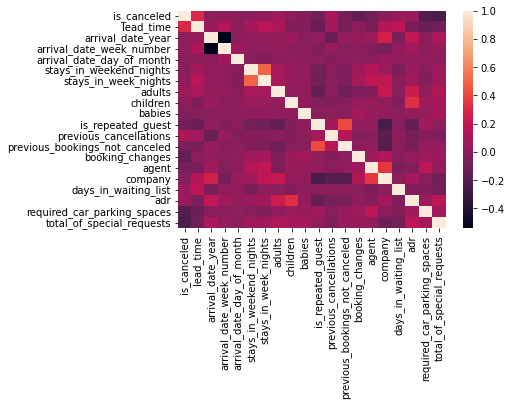

In [ ]:
sns.heatmap(df.corr())

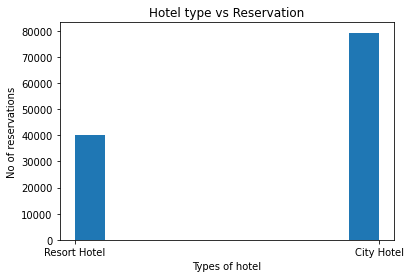

In [ ]:
plt.hist(df.Hotel_type)
plt.xlabel("Types of hotel")
plt.ylabel("No of reservations")
plt.title("Hotel type vs Reservation")
plt.show()

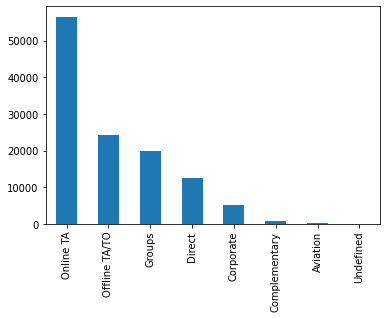

In [ ]:
df.market_segment.value_counts().plot.bar()

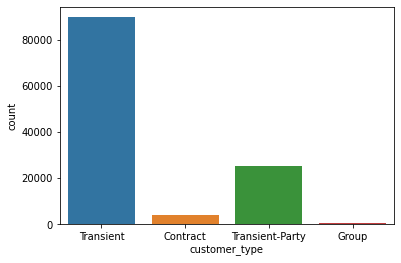

In [ ]:
sns.countplot(x=df.customer_type,data=df)#gives the count of customer type in bar plot

In [ ]:
sns.countplot(x=df.customer_type,data=df,hue='is_canceled')

The hue value is added in this plot and the significance of it is that it says in transient customer type the cancelled bookings is more ie breaking the simple countplot into more depths of another column and this is shown in the below group by chart in the form of numbers

In [ ]:
df[['customer_type','is_canceled']].groupby(['customer_type']).agg(['mean','count'])

The above plot is been confirmed from this table. We need to focus on the mean column
and in that we see the mean of Transient is more which tells us that the no of cancellations done 
is from Transient customer type and the mean is calculated by 33409/77756 where 33409 is the rows
where is_cancelled value is 1 ie cancellation done and 77756 is the total count of transient customer type.
All the above details is shown in the below cross tab

In [ ]:
pd.crosstab(df.is_canceled,df.customer_type,margins=True)
#This is the cross tab which tells the no of ones and zeros in each customer type

In [ ]:
sns.barplot(x = 'customer_type',y = 'is_canceled', data = df)

This is plot of customer type with the mean which was shown above and the black line
denotes the deviation in the values of those columns so basically the Group has the largest deviation 
which means its not sure wether this customer type would cancel or not even though its mean value is less
because its deviation is more and similarly we can say that Transient customer type would cancel with more 
assurity as its deviation is less

In [ ]:
sns.barplot(x = 'customer_type',y = 'is_canceled', hue='Hotel_type', data = df)

The above plot shows that in every type of customers who are booking in City hotel are doing more cancellations as their mean value is more than Resort hotel and also a large amount of deviation is seen in Group customer type wrt to both Resort and City hotel.
One more inference can be drawn is that the Transient customers are doing more cancellations in Resort hotel type as comapared to other customers in same type of hotel.